Tanuj 'Rick' Guha


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

Importing Datasets

In [3]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data Preprocessing

In [61]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [63]:
gender = LabelEncoder() #one hot encoding Sex where male is 1 and female is 0
train['gender'] = gender.fit_transform(train['Sex'])
train = train.drop(['Sex'], axis=1)
train = train.dropna()

In [82]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,pred
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,1,0


In [65]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [66]:
gender = LabelEncoder() #one hot encoding Sex where male is 1 and female is 0
test['gender'] = gender.fit_transform(test['Sex'])
test = test.drop(['Sex'], axis=1)
test = test.dropna()

In [67]:
test.head(5)

,Pclass,Age,SibSp,Parch,Fare,gender
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


Creating the model

In [68]:
x = train.drop(['Survived'], axis=1).values
y = train['Survived'].values

In [69]:
tree1 = DecisionTreeClassifier ()
tree1.fit(X=x, y=y)
train["pred"] = tree1.predict(x)
pd.crosstab (y, train.pred)

pred,0,1
row_0,,
0,424,0
1,10,280


Using the tree to predict survival on the test set.

In [84]:
test["pred"] = tree1.predict(test.values)
test.head()

,Pclass,Age,SibSp,Parch,Fare,gender,pred
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,1
4,3,22.0,1,1,12.2875,0,0


Visualize the Tree

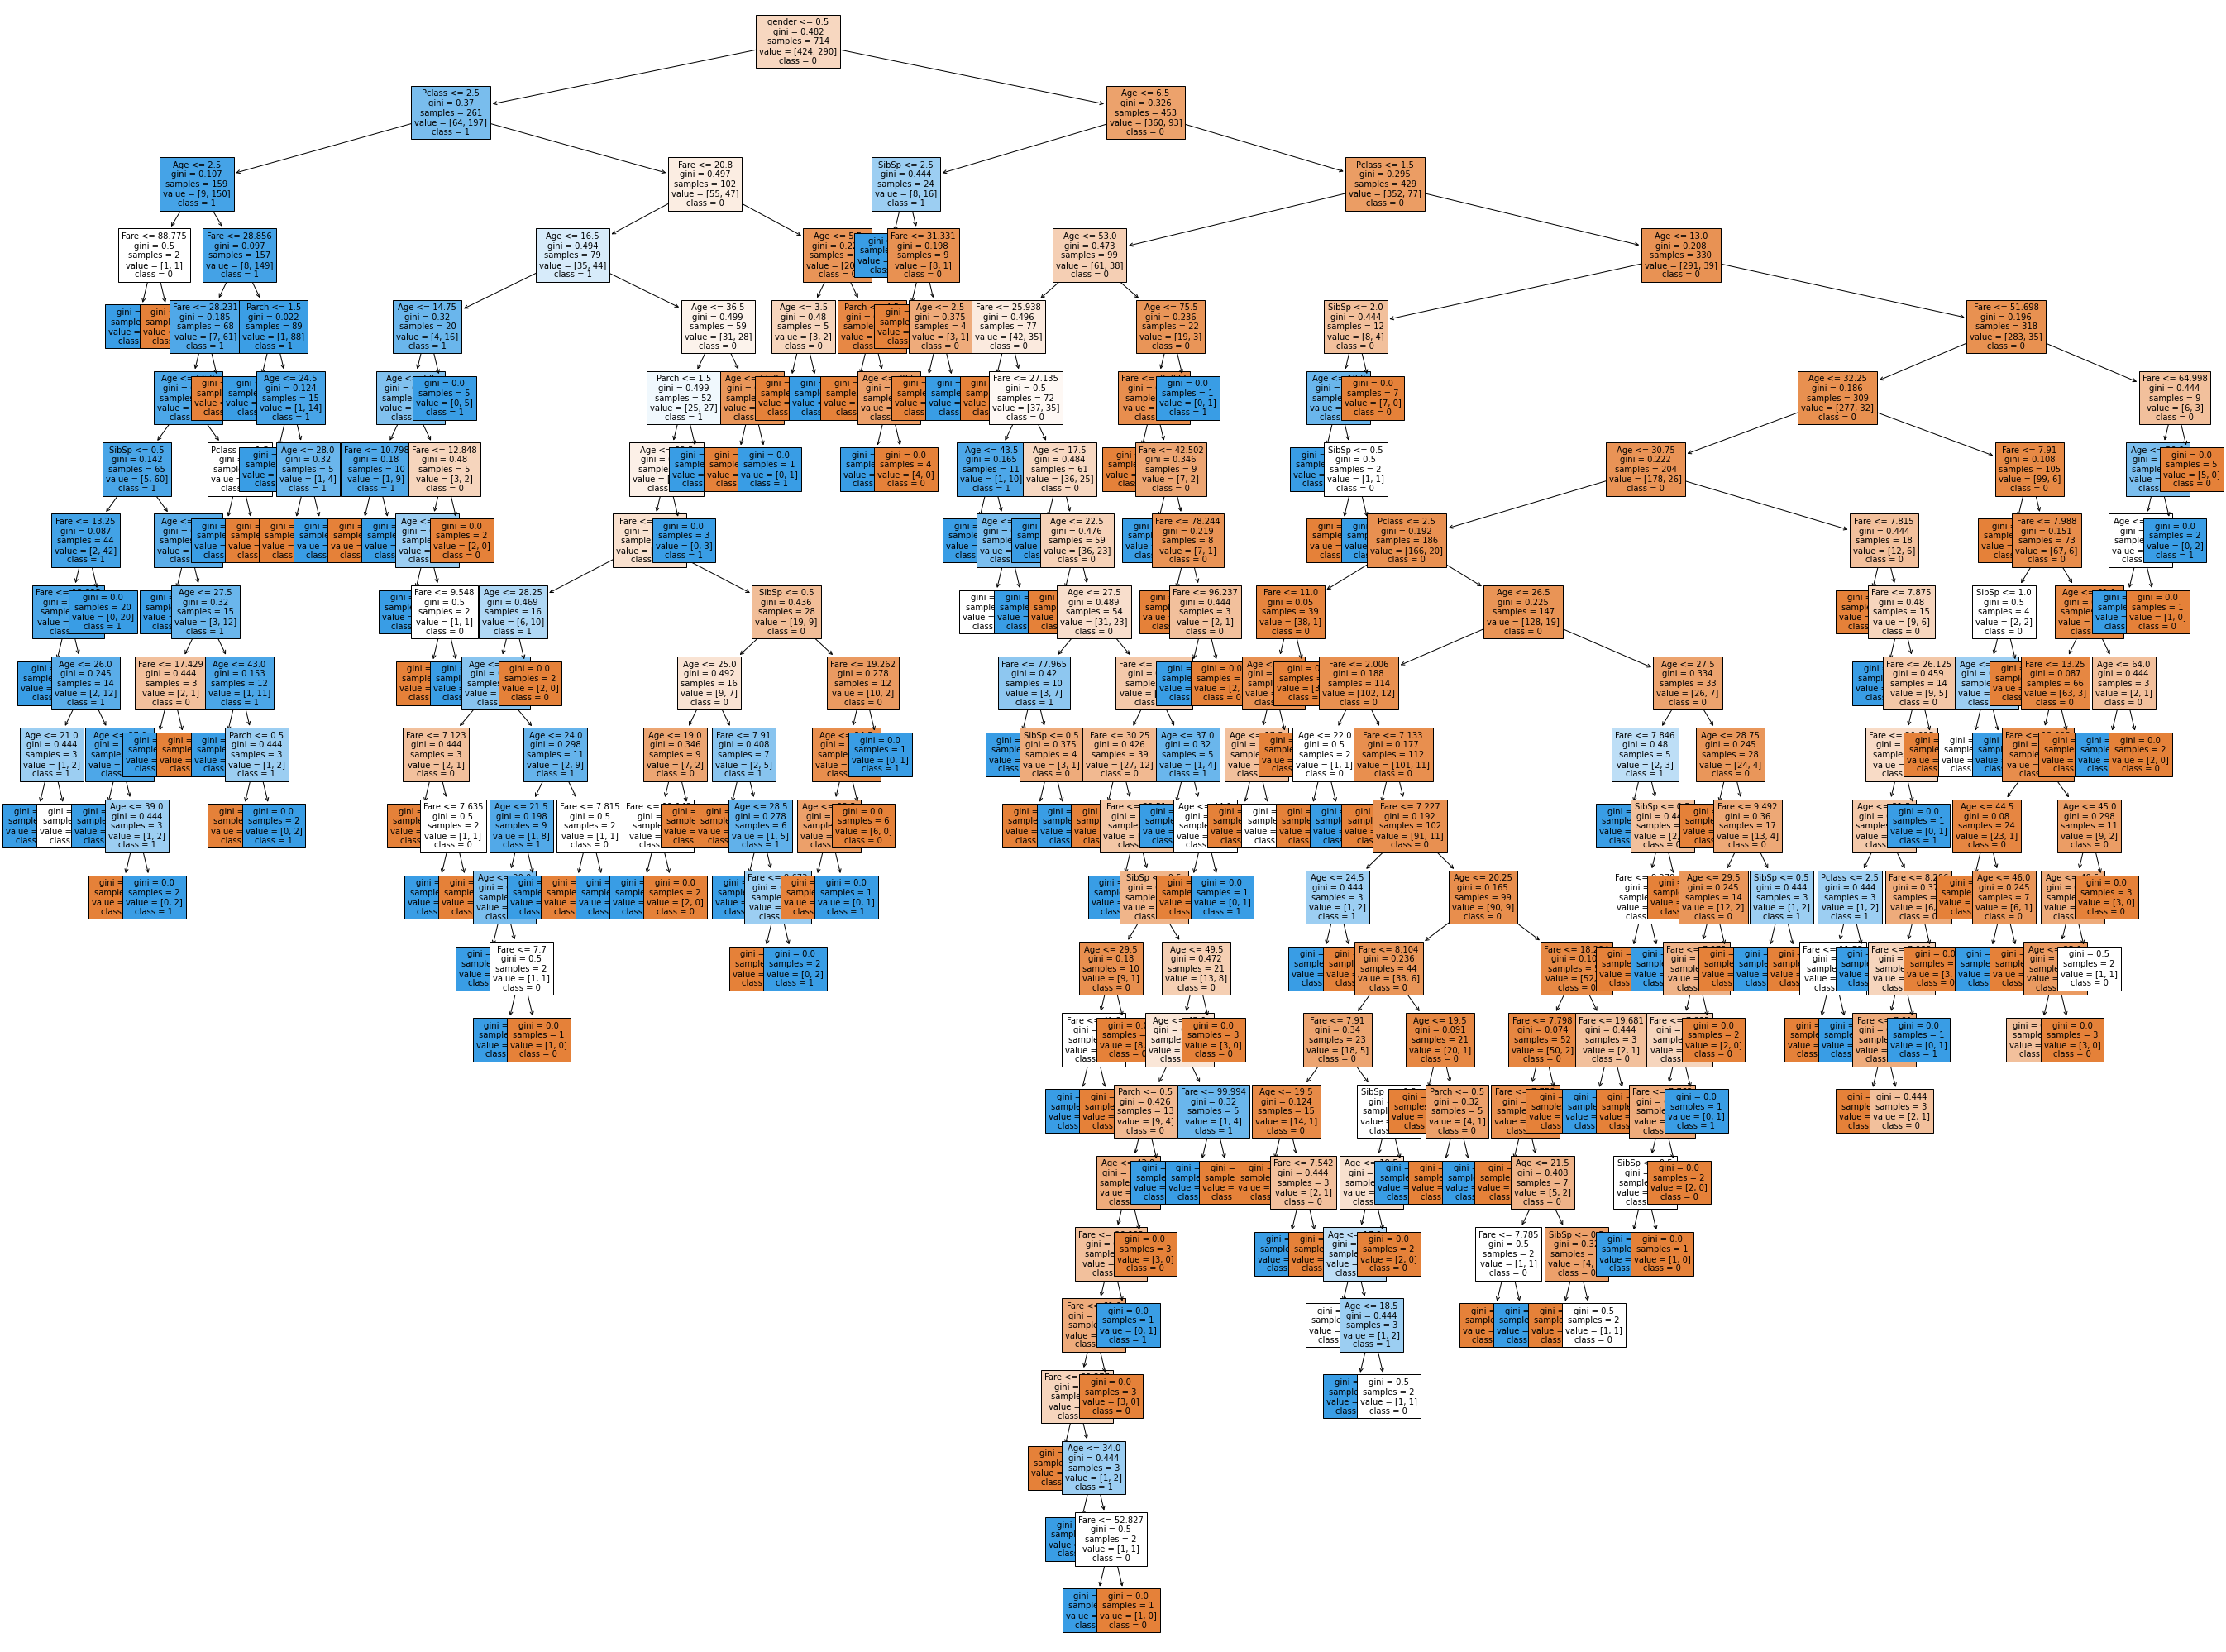

In [73]:
fn = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender']
cn = ['0', '1']
fig, ax = plt.subplots(figsize=(47.5, 36.5))
tree.plot_tree(tree1, 
               feature_names = fn, 
               class_names=cn,
               filled = True,
               fontsize=10)
plt.show()

In [7]:
train.shape


(891, 12)